# Исследование стартапа, продающего продукты питания

**Описание проекта:**

Стартап, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи мобильного приложения.
___
**Цели исследования:**
1. Исследовать поведения пользователей в воронке продаж:
- Как пользователи доходят до покупки; 
- Сколько пользователей доходит до покупки;
- Сколько пользователей «застревает» на предыдущих шагах и на каких именно.

2. Исследовать результаты A/A/B-эксперимента по смене шрифтов:
- Сравнить результаты двух контрольных групп A (со старыми шрифтами), чтобы убедиться в отсутствии значимых различий между ними, что подтвердит корректность эксперимента.
- Исследовать экспериментальную группу B (с новыми шрифтами), чтобы выяснить, как изменение шрифтов влияет на ключевые показатели: конверсию, взаимодействие с приложением и завершение покупки.
- Оценить, отличается ли поведение пользователей экспериментальной группы по сравнению с контрольными группами.
___
**Данные для анализа:**

1 файл `logs_exp.csv` со столбцами:
- `EventName` — название события;
- `DeviceIDHash` — уникальный идентификатор пользователя;
- `EventTimestamp` — время события;
- `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

Каждая запись в логе — это действие пользователя, или событие. 

___
**План работы:**
1. Загрузка и первичное знакомство с данными.
    - Загрузить данные из файла `/datasets/logs_exp.csv` в датафрейм;
    - Изучить общую информацию о данных.


2. Предобработка данных:
    - Заменить названия столбцов на удобные для работы;
    - Проверить наличие пропусков и корректность типов данных (особенно для дат);
    - Проверить наличие дубликатов; 
    - Создать новые столбцы, если потребуется.


3. Исследовательский анализ данных:
- 3.1. Исследовать информацию о событиях и пользователях.
    - Подсчитать количество всех событий;
    - Подсчитать количество уникальных пользователей;
    - Рассчитать среднее количество событий на одного пользователя;
    - Найти временной период, который охватывают данные.
- 3.2. Построить и исследовать график количества событий по времени в разрезе экспериментальных групп.
    
- 3.3. Проверить полноту данных.
    
- 3.4. Исследовать информацию о событиях и пользователях после очистки данных (если потребуется).


4. Анализ воронки событий.
- 4.1. Подсчитать частоту каждого события;
- 4.2. Подсчитать количество и долю уникальных пользователей для каждого события;
- 4.3. Исследовать воронку событий:
    - Определить последовательность событий;
    - Подсчитать, какая доля пользователей проходит с одного шага на следующий;
    - Построить воронку событий;
    - Определить шаг, на котором теряется больше всего пользователей;
    - Определить какая доля пользователей доходит от первого события до оплаты.
    

5. Анализ результатов A/A/B-эксперимента.
- 5.1. Подсчитать количество пользователей в каждой группе;
- 5.2. Проверить корректность разбиения на контрольные группы (А/А-эксперимент):
    - Сравнить контрольные группы (246 и 247) с помощью z-теста для пропорций.
- 5.3. Проверить, есть ли разница между долями пользователей в экспериментальной группе (248) и контрольных группах (246 и 247).
    - Сравнить экспериментальную группу (248) с контрольными группами (246 и 247) по отдельности по каждому событию с помощью z-теста для пропорций;
    - Сравнить экспериментальную группу (248) с объединенной контрольной группой (246 + 247) по каждому событию с помощью z-теста для пропорций.
- 5.4. Корректировка уровня значимости. Повторить сравнения групп (если требуется).


6. Выводы и интерпретация результатов эксперимента.

## Загрузка и знакомство с данными

**1.1. Импортируем все библиотеки, необходимые для анализа.**

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest

**1.2. Считываем данные из csv-файла и сохраняем в датафрейм logs.**

In [151]:
try:
    logs = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
except:
    logs = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp.csv', sep='\t')

**1.3. Выведем первые и последние строки логов.**

In [153]:
display(logs)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


**1.4. Выведем основную информацию о датафрейме с помощью методов describe() и info().**

In [157]:
print('Общая информация о данных:')
display(logs.describe())
display(logs.info())

Общая информация о данных:


,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

**Выводы:** 
1. Общая информация: датасет `logs` содержит *244126 строк, 4 столбца*. Столбцы `DeviceIDHash`, `EventTimestamp`, и `ExpId` имеют целочисленный тип данных, `EventName` - строковый.
2. Типы данных: столбец `EventTimestamp` нужно преобразовать в формат даты и времени для удобного анализа.

## Предобработка данных

**2.1. Переименуем столбцы, добавив нижние подчеркивания и приведя к нижнему регистру.**

In [162]:
logs.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']

# Проверим изменения
logs.columns

Index(['event_name', 'device_id_hash', 'event_timestamp', 'exp_id'], dtype='object')

**2.2. Приведем типы данных и добавим столбец с датой.**

In [165]:
# Приведем столбец event_timestamp в формат datetime
logs['event_timestamp'] = pd.to_datetime(logs['event_timestamp'], unit='s')

# Добавляем столбец только с датой
logs['date'] = logs['event_timestamp'].dt.date

# Проверим изменения
logs.head()

,event_name,device_id_hash,event_timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


**2.3. Проверим данные на наличие пропусков.**

In [168]:
missing_values_count = logs.isna().sum()
missing_values_share = logs.isna().mean() * 100

missing_data = pd.DataFrame({'missing_values_count': missing_values_count, 'missing_values_share': missing_values_share}).sort_values(by='missing_values_count', ascending=False)

missing_data

,missing_values_count,missing_values_share
event_name,0,0.0
device_id_hash,0,0.0
event_timestamp,0,0.0
exp_id,0,0.0
date,0,0.0


**2.4. Проверим данные на наличие дубликатов.**

In [171]:
# Удалим пробелы в начале и в конце строк
logs['event_name'] = logs['event_name'].str.strip()

# Проверим на наличие явных дубликатов после нормализации данных
print(logs.duplicated().sum())

413


In [173]:
# Удалим явные дубликаты
logs.drop_duplicates(inplace=True)

# Проверим изменения
print(logs.duplicated().sum())

0


In [175]:
# Проверим на неявные дубликаты по сабсету
duplicates_subset = logs.duplicated(subset=['event_name', 'device_id_hash', 'event_timestamp'], keep=False)
duplicated_rows = logs[duplicates_subset]
duplicated_rows

,event_name,device_id_hash,event_timestamp,exp_id,date


In [177]:
# Посмотрим на датасет после предобработки данных
display(logs)

,event_name,device_id_hash,event_timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


**Выводы:**
1. Приведение типов данных: столбец event_timestamp преобразован в формат datetime.

2. Дубликаты: обнаружены и удалены 413 явных строк дубликатов.

3. Пропущенные значения: нет.

4. Новые столбцы: добавлен 1 новый столбец с датой.

5. Столбцы переименованы: приведены к нижнему регистру, добавлены нижние подчеркивания.


Изменения данных:
- До предобработки данных было 244126 строк, 4 столбца.
- Удалены 413 (0.17%) явных дубликатов, добавлен 1 новый столбец с датой.
- После предобработки данных стало 243713 строки и 5 столбцов. 

## Исследовательский анализ данных

**3.1. Исследовательский анализ исходных данных.**
- Подсчитаем количество событий в логе, количество уникальных пользователей, среднее количество событий на пользователя. 
- Найдём минимальную и максимальную дату логов. 
- Построим столбчатую диаграмму количества событий по времени в разрезе групп.

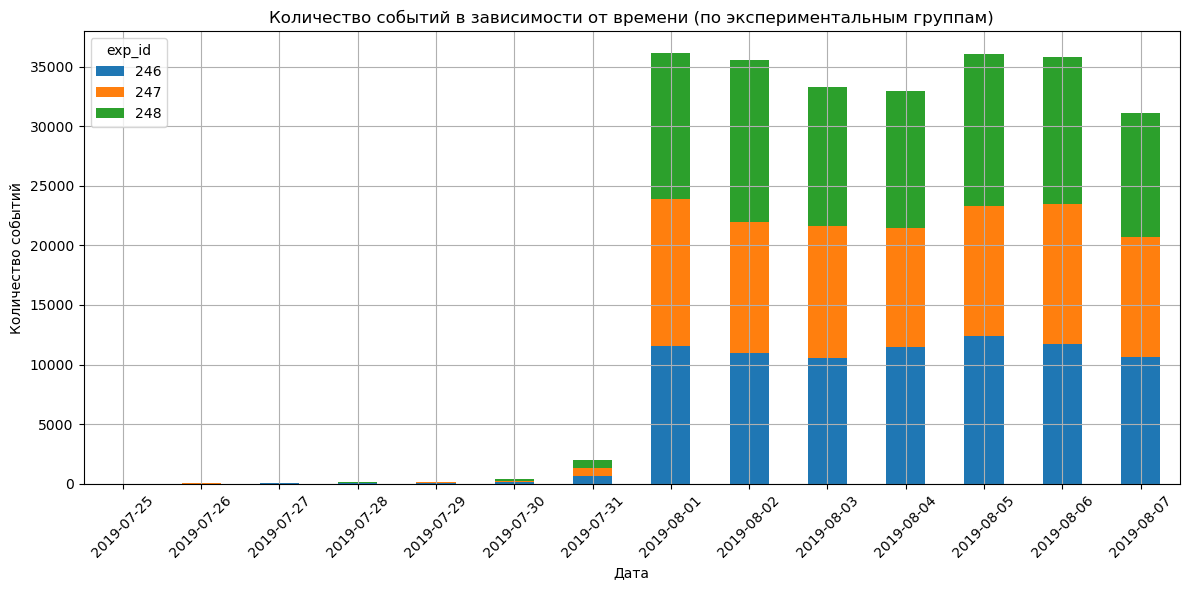

Всего событий: 243713

Всего пользователей: 7551
Среднее количество событий на пользователя: 32.28

Минимальная дата логов: 2019-07-25
Максимальная дата логов: 2019-08-07


In [182]:
# Подсчитаем количество событий в логе
total_events = logs.shape[0]

# Подсчитаем количество уникальных пользователей
total_users = logs['device_id_hash'].nunique()

# Подсчитаем среднее количество событий на пользователя
avg_events_per_user = round(total_events / total_users, 2)

# Найдём минимальную и максимальную дату логов
min_date = logs['date'].min()
max_date = logs['date'].max()

# Построим столбчатую диаграмму количества событий по времени в разрезе групп
events_by_date_group = logs.groupby(['date', 'exp_id']).size().unstack()

# Строим график
events_by_date_group.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Количество событий в зависимости от времени (по экспериментальным группам)')
plt.xlabel('Дата')
plt.ylabel('Количество событий')

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

# Выведем результаты
print(f"Всего событий: {total_events}")
print(f"\nВсего пользователей: {total_users}")
print(f"Среднее количество событий на пользователя: {avg_events_per_user}")
print(f"\nМинимальная дата логов: {min_date}")
print(f"Максимальная дата логов: {max_date}")

**3.2. Проверка на полноту данных.**

По графику виден резкий рост числа событий с 01 авуста 2019 года. До этого периода количество событий на порядок меньше, что может указывать на неполные данные за первые дни (с 25 по 30 июля 2019 года). 

Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Поэтому:
- Полными будем считать данные начиная с 01 августа 2019 года.
- События до этой даты исключим из анализа, так как они могут вносить искажения.

Фильтруем данные, начиная с 01 августа 2019 года. Подсчитаем количество событий и количество пользователей после фильтрации данных. Подсчитаем количество потерянных событий и пользователей. Проверим наличие всех 3 экспериментальных групп.

In [187]:
# Фильтруем данные, начиная с 01 августа 2019 года
filtered_logs = logs[logs['event_timestamp'] >= '2019-08-01']

# Подсчитаем количество событий и количество пользователей после фильтрации данных
filtered_total_events = filtered_logs.shape[0]
filtered_total_users = filtered_logs['device_id_hash'].nunique()

# Проверим наличие всех 3 экспериментальных групп
exp_groups = filtered_logs['exp_id'].unique()

# Подсчитаем количество потерянных событий и пользователей
events_lost = total_events - filtered_total_events
users_lost = total_users - filtered_total_users

# Подсчитаем процент потерянных событий и пользователей
events_lost_share = (events_lost / total_events) * 100
users_lost_share = (users_lost / total_users) * 100

print(f"Количество потерянных событий: {events_lost}")
print(f"Процент потерянных событий: {events_lost_share:.2f}%")
print(f"\nКоличество потерянных пользователей: {users_lost}")
print(f"Процент потерянных пользователей: {users_lost_share:.2f}%")
print(f"\nЭкспериментальные группы: {exp_groups}")

Количество потерянных событий: 2826
Процент потерянных событий: 1.16%

Количество потерянных пользователей: 17
Процент потерянных пользователей: 0.23%

Экспериментальные группы: [246 247 248]


**3.3. Исследовательский анализ очищенных данных.**
- Подсчитаем количество событий в логе, количество уникальных пользователей, среднее количество событий на пользователя. 
- Найдём минимальную и максимальную дату логов.

In [190]:
# Подсчитаем среднее количество событий на пользователя
filtered_avg_events_per_user = round(filtered_total_events / filtered_total_users, 2)

# Найдём минимальную и максимальную дату логов
filtered_min_date = filtered_logs['date'].min()
filtered_max_date = filtered_logs['date'].max()

# Выведем результаты
print(f"Всего событий после очистки данных: {filtered_total_events}")
print(f"\nВсего пользователей после очистки данных: {filtered_total_users}")
print(f"Среднее количество событий на пользователя после очистки данных: {filtered_avg_events_per_user}")
print(f"\nМинимальная дата логов после очистки данных: {filtered_min_date}")
print(f"Максимальная дата логов после очистки данных: {filtered_max_date}")

Всего событий после очистки данных: 240887

Всего пользователей после очистки данных: 7534
Среднее количество событий на пользователя после очистки данных: 31.97

Минимальная дата логов после очистки данных: 2019-08-01
Максимальная дата логов после очистки данных: 2019-08-07


**Выводы:**
1. Информация о событиях и пользователях:
    - Всего событий: 243713.
    - Всего пользователей: 7551.
    - Среднее количество событий на пользователя: 32.27.
    - События за период с 25.07.2019 по 07.08.2019.


Число событий с 01 авуста 2019 года резко выросло. До этого периода количество событий на порядок меньше, что может указывать на неполные данные за первые дни (с 25 по 31 июля 2019 года). Полными будем считать данные начиная с 01 августа 2019 года. События до этой даты исключим из анализа, так как они могут вносить искажения.


2. Информация об удаленных событиях с 25 по 31 июля 2019 года:
    - Количество потерянных событий: 2826 (1.16% от общего количества).
    - Количество потерянных пользователей: 17 (0.23% от общего количества).


3. Информация о событиях и пользователях после очистки данных:
    - Всего событий: 240887.
    - Всего пользователей: 7534.
    - Среднее количество событий на пользователя: 31.97.
    - События за период с 01.08.2019 по 07.08.2019.
    - Все 3 экспериментальные группы присутствуют.

## Анализ воронки событий

**4.1. Посмотрим, какие события есть в логах, как часто они встречаются. Подсчитаем частоту каждого события.**

In [196]:
# Подсчитаем частоту каждого события и отсортируем по убыванию
event_frequencies = filtered_logs['event_name'].value_counts()

# Создаем DataFrame с событиями
events_df = pd.DataFrame({
    'event_name': event_frequencies.index,
    'events_count': event_frequencies.values
})

events_df['events_share'] = round((events_df['events_count'] / filtered_total_events) * 100, 2)

# Выведем результаты
display(events_df)

,event_name,events_count,events_share
0,MainScreenAppear,117328,48.71
1,OffersScreenAppear,46333,19.23
2,CartScreenAppear,42303,17.56
3,PaymentScreenSuccessful,33918,14.08
4,Tutorial,1005,0.42


**4.2. Подсчитаем количество и долю уникальных пользователей для каждого события.**

In [199]:
# Подсчитаем количество уникальных пользователей для каждого события
event_users = filtered_logs.groupby('event_name')['device_id_hash'].nunique()

# Добавим количество уникальных пользователей в events_df
events_df['users_count'] = events_df['event_name'].map(event_users)

# Добавим столбец с долей уникальных пользователей для каждого события
events_df['users_share'] = round((events_df['users_count'] / filtered_total_users) * 100, 2)

# Выведем результаты
events_df = events_df.sort_values(by='users_count', ascending=False)
display(events_df)

,event_name,events_count,events_share,users_count,users_share
0,MainScreenAppear,117328,48.71,7419,98.47
1,OffersScreenAppear,46333,19.23,4593,60.96
2,CartScreenAppear,42303,17.56,3734,49.56
3,PaymentScreenSuccessful,33918,14.08,3539,46.97
4,Tutorial,1005,0.42,840,11.15


**4.3. Строим и анализируем воронку продаж.**

На основании списка событий можно предположить следующую логическую последовательность, которая отражает пользовательский путь в приложении:
1. MainScreenAppear — появление главного экрана. Это первый этап, пользователь открывает приложение.
2. OffersScreenAppear — появление экрана с предложениями. Пользователь переходит к просмотру товаров.
3. CartScreenAppear — появление экрана корзины. Пользователь добавляет товары в корзину и переходит к оформлению заказа.
4. PaymentScreenSuccessful — успешное завершение оплаты. Это последний этап, пользователь завершает покупку.

Событие Tutorial (обучение) - обычно появляется начале пользовательского пути и является необязательным шагом. Пользователи часто скипают обучение, что мы и видим по конверсии (11.15%). 

Не будем учитывать событие Tutorial при расчете воронки продажи, так как оно не связано напрямую с процессом покупки.

In [204]:
# Удалим событие 'Tutorial' из расчета воронки продаж
events_df = events_df[events_df['event_name'] != 'Tutorial']

Подсчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем).

In [209]:
# Подсчитаем долю пользователей, переходящих на следующий шаг воронки
events_df['users_next_step_share'] = round((events_df['users_count'].shift(-1) / events_df['users_count']).shift(1) * 100, 2)
events_df['users_next_step_share'] = events_df['users_next_step_share'].fillna(100)
events_df

,event_name,events_count,events_share,users_count,users_share,users_next_step_share
0,MainScreenAppear,117328,48.71,7419,98.47,100.00
1,OffersScreenAppear,46333,19.23,4593,60.96,61.91
2,CartScreenAppear,42303,17.56,3734,49.56,81.30
3,PaymentScreenSuccessful,33918,14.08,3539,46.97,94.78


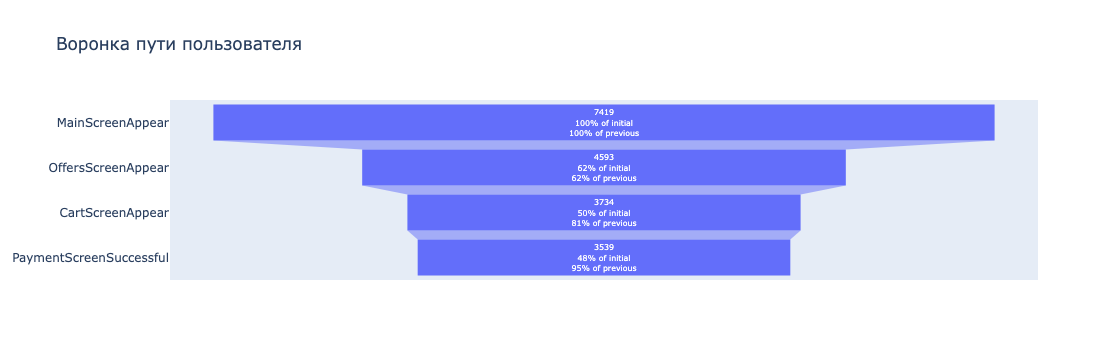

In [211]:
# Данные для воронки
labels = events_df['event_name']
values = events_df['users_count']

# Создаем воронку
fig = go.Figure(go.Funnel(
    y=labels,
    x=values,
    textinfo="value+percent initial+percent previous"
))

# Выводим график
fig.update_layout(title="Воронка пути пользователя")
fig.show()

In [213]:
# Найдем шаг с наибольшей потерей пользователей
max_loss_step = events_df.loc[events_df['users_next_step_share'].idxmin(), 'event_name']
max_loss_value = 100 - events_df['users_next_step_share'].min()

# Выведем результат
print(f"Шаг с наибольшей потерей пользователей: {max_loss_step}")
print(f"Доля потерянных пользователей на этом шаге: {max_loss_value}")

Шаг с наибольшей потерей пользователей: OffersScreenAppear
Доля потерянных пользователей на этом шаге: 38.09


In [215]:
# Добавим долю пользователей, дошедших до оплаты от первого события
users_first_event = events_df.loc[0, 'users_count']
users_payment = events_df.loc[3, 'users_count']
users_payment_share = round(users_payment / users_first_event * 100, 2)
print(f"Доля пользователей, дошедших до оплаты от первого события: {users_payment_share}")

Доля пользователей, дошедших до оплаты от первого события: 47.7


**Выводы:**

Не будем учитывать событие Tutorial при расчете воронки продажи, так как обучение не связано напрямую с процессом покупки. Пользователи часто скипают обучение, что мы и видим по конверсии (11.15%).


1. Этапы воронки продаж:
    - MainScreenAppear (Главный экран): 48.71% от общего числа событий, переходят 7419 пользователей (98.47% от всех пользователей). Почти все пользователи взаимодействуют с главным экраном. 
    - OffersScreenAppear (Экран предложений с товарами): 19.23% от общего числа событий, переходят 4593 пользователей (60.96% от всех пользователей). Доля перехода с главного экрана: 61.91%. Значительная часть пользователей (около 38.09%) покидает приложение на этом шаге.
    - CartScreenAppear (Экран корзины): 17.56% от общего числа событий, переходят 3734 пользователей (49.56% от всех пользователей). Из тех, кто дошел до экрана предложений товаров, 81.30% переходят к экрану корзины.
    - PaymentScreenSuccessful (Успешная оплата): 14.08% от общего числа событий, переходят 3539 пользователей (46.97% от всех пользователей). 94.78% пользователей, дошедших до корзины, завершают покупку. Потеря на этом этапе минимальна (5.22%).


2. Анализ воронки продаж:
    - Высокий уровень конверсии на этапах после выбора товаров: 81.30% переходят к корзине, и 94.78% из них завершают покупку.
    - Основная потеря пользователей происходит на этапе между главным экраном и экраном предложений: 38.09% пользователей не переходят к следующему шагу.
    - 47.7% пользователей, начавших с главного экрана, успешно завершают покупку.

## Анализ A/A/B-эксперимента

**5.1. Подсчитаем сколько пользователей в каждой экспериментальной группе.**

In [220]:
# Подсчитаем количество пользователей в каждой экспериментальной группе
users_per_group = logs.groupby('exp_id')['device_id_hash'].nunique()

users_per_group 

exp_id
246    2489
247    2520
248    2542
Name: device_id_hash, dtype: int64

Выводы:
- В каждой группе примерно одинаковое количество пользователей:
    - контрольная 246: 2489 пользователей.
    - контрольная 247: 2520 пользователей.
    - эксперимннтальная 248: 2542 пользователей.

**5.2. Проверим, есть ли разница между долями пользователей в контрольных группах 246 и 247 по каждому событию воронки.**

Для проверки равенства долей пользователей, совершивших события (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful)  в двух контрольных группах (246 и 247), будем использовать z-тест для пропорций. Это поможет сравнить доли пользователей, совершивших определённое действие, в двух независимых выборках.

**Нулевая гипотеза:** Нет разницы между долями пользователей, совершивших событие воронки, в контрольных группах. 


**Альтернативная гипотеза:** Существует статистически значимая разница между долями пользователей, совершивших событие воронки, в контрольных группах. 

**Уровень значимости (α):** 0.05.

In [226]:
# Уровень значимости
alpha = 0.05 

# Функция для проведения z-теста для пропорций между двумя группами
def compare_groups(event_name, group_a, group_b):
    success_a = filtered_logs[(filtered_logs['exp_id'] == group_a) & (filtered_logs['event_name'] == event_name)]['device_id_hash'].nunique()
    success_b = filtered_logs[(filtered_logs['exp_id'] == group_b) & (filtered_logs['event_name'] == event_name)]['device_id_hash'].nunique()
    
    total_a = filtered_logs[filtered_logs['exp_id'] == group_a]['device_id_hash'].nunique()
    total_b = filtered_logs[filtered_logs['exp_id'] == group_b]['device_id_hash'].nunique()
    
    success_counts = [success_a, success_b]
    total_counts = [total_a, total_b] 
    
    stat, p_value = proportions_ztest(success_counts, total_counts)
    
    return stat, p_value

# Функция для проверки всех событий
def compare_all_events(logs, group_a, group_b):
    events = filtered_logs['event_name'].unique()
    results = []
    
    for event in events:
        if event != 'Tutorial':  # Пропускаем событие Tutorial
            stat, p_value = compare_groups(event, group_a, group_b)
            results.append((event, stat, p_value))
    
    return results

# Сравним все события в группах 246 и 247
results_246_247 = compare_all_events(logs, 246, 247)

# Выведем результаты для всех событий
for event, stat, p_value in results_246_247:
    print(f"Событие: {event}, z-statistic: {stat:.2f}, p-value: {p_value:.2f}")
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу. Между контрольными группами (246 и 247) есть статистическая разница.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в контрольных группах (246 и 247).\n')

Событие: MainScreenAppear, z-statistic: 0.31, p-value: 0.76
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в контрольных группах (246 и 247).

Событие: OffersScreenAppear, z-statistic: 1.15, p-value: 0.25
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в контрольных группах (246 и 247).

Событие: CartScreenAppear, z-statistic: 1.20, p-value: 0.23
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в контрольных группах (246 и 247).

Событие: PaymentScreenSuccessful, z-statistic: 1.58, p-value: 0.11
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в контрольных группах (246 и 247).



Выводы:
- Для всех событий (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful) не удалось отвергнуть нулевую гипотезу.  Все p-value значительно превышают уровень значимости 0.05. Это означает, что нет статистически значимой разницы между долями пользователей, совершивших эти события, в контрольных группах 246 и 247.
- А/А-эксперимент показал, что различий между контрольными группами нет, что подтверждает правильность функционирования эксперимента.

**5.3. Проверим, есть ли разница между долями пользователей в экспериментальной группе с изменённым шрифтом (248) с каждой контрольной группой (246 и 247) и объединенной контрольной группой по каждому событию воронки.**

**Нулевая гипотеза:** Нет разницы между долями пользователей, совершивших событие, в экспериментальной группе с изменённым шрифтом (248) и контрольной группой (246).

**Альтернативная гипотеза:** Существует статистически значимая разница между долями пользователей, совершивших событие, в экспериментальной группе с изменённым шрифтом (248) и контрольной группой (246). 

**Уровень значимости (α):** 0.05.

In [231]:
# Сравним все события в группах 246 и 248
results_246_248 = compare_all_events(filtered_logs, 246, 248)

# Выведем результаты для всех событий
for event, stat, p_value in results_246_248:
    print(f"Событие: {event}, z-statistic: {stat:.2f}, p-value: {p_value:.2f}")
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу. Между экспериментальной группой с изменённым шрифтом (248) и контрольной группой (246) есть статистическая разница.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе с изменённым шрифтом (248) и контрольной группе (246).\n'
    ) 

Событие: MainScreenAppear, z-statistic: 1.05, p-value: 0.29
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе с изменённым шрифтом (248) и контрольной группе (246).

Событие: OffersScreenAppear, z-statistic: 1.26, p-value: 0.21
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе с изменённым шрифтом (248) и контрольной группе (246).

Событие: CartScreenAppear, z-statistic: 1.76, p-value: 0.08
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе с изменённым шрифтом (248) и контрольной группе (246).

Событие: PaymentScreenSuccessful, z-statistic: 1.25, p-value: 0.21
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе с изменённым шрифтом (248) и контрольной группе (246).



**Нулевая гипотеза:** Нет разницы между долями пользователей, совершивших событие, в экспериментальной группе с изменённым шрифтом (248) и контрольной группой (247).

**Альтернативная гипотеза:** Существует статистически значимая разница между долями пользователей, совершивших событие, в экспериментальной группе с изменённым шрифтом (248) и контрольной группой (247). 

**Уровень значимости (α):** 0.05.

In [234]:
# Сравним все события в группах 247 и 248
results_247_248 = compare_all_events(filtered_logs, 247, 248)

# Выведем результаты для всех событий
for event, stat, p_value in results_247_248:
    print(f"Событие: {event}, z-statistic: {stat:.2f}, p-value: {p_value:.2f}")
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу. Между экспериментальной группой с изменённым шрифтом (248) и контрольной группой (247) есть статистическая разница.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе с изменённым шрифтом (248) и контрольной группе (247).\n'
    ) 

Событие: MainScreenAppear, z-statistic: 0.74, p-value: 0.46
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе с изменённым шрифтом (248) и контрольной группе (247).

Событие: OffersScreenAppear, z-statistic: 0.10, p-value: 0.92
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе с изменённым шрифтом (248) и контрольной группе (247).

Событие: CartScreenAppear, z-statistic: 0.56, p-value: 0.58
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе с изменённым шрифтом (248) и контрольной группе (247).

Событие: PaymentScreenSuccessful, z-statistic: -0.34, p-value: 0.74
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе с изменённым шрифтом (248) и контрольной группе (247).



**Нулевая гипотеза:** Нет разницы между долями пользователей, совершивших событие, в экспериментальной группе с изменённым шрифтом (248) и объединенной контрольной группой (246 и 247).

**Альтернативная гипотеза:** Существует статистически значимая разница между долями пользователей, совершивших событие, в экспериментальной группе с изменённым шрифтом (248) и объединенной контрольной группой (246 и 247). 

**Уровень значимости (α):** 0.05.

In [237]:
# Добавим столбец - объединенная контрольная группа (если 246, 247 - 1, если нет - 0)
filtered_logs = filtered_logs.copy()
filtered_logs['control_group'] = filtered_logs['exp_id'].apply(lambda x: 1 if x in [246, 247] else 0)

# Проверим для каждого события группу 248 против объединенной контрольной группы 
results_248_control = []

events = filtered_logs['event_name'].unique()
for event in events:
    if event != 'Tutorial': 
        success_control = filtered_logs[(filtered_logs['control_group'] == 1) & (filtered_logs['event_name'] == event)]['device_id_hash'].nunique()
        success_248 = filtered_logs[(filtered_logs['exp_id'] == 248) & (filtered_logs['event_name'] == event)]['device_id_hash'].nunique()

        total_control = filtered_logs[filtered_logs['control_group'] == 1]['device_id_hash'].nunique()
        total_248 = filtered_logs[filtered_logs['exp_id'] == 248]['device_id_hash'].nunique()

        success_counts = [success_control, success_248]
        total_counts = [total_control, total_248]

        stat, p_value = proportions_ztest(success_counts, total_counts)
        results_248_control.append((event, stat, p_value))

# Вывод результатов
for event, stat, p_value in results_248_control:
    print(f"Событие: {event}, z-statistic: {stat:.2f}, p-value: {p_value:.2f}")
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу. Есть статистическая разница между экспериментальной группой (248) и объединённой контрольной группой (246 и 247).\n')
    else:
        print('Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе (248) и объединённой контрольной группе (246 и 247).\n')

Событие: MainScreenAppear, z-statistic: 1.05, p-value: 0.29
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе (248) и объединённой контрольной группе (246 и 247).

Событие: OffersScreenAppear, z-statistic: 0.78, p-value: 0.43
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе (248) и объединённой контрольной группе (246 и 247).

Событие: CartScreenAppear, z-statistic: 1.34, p-value: 0.18
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе (248) и объединённой контрольной группе (246 и 247).

Событие: PaymentScreenSuccessful, z-statistic: 0.52, p-value: 0.60
Не получилось отвергнуть нулевую гипотезу. Нет статистической разницы между долями пользователей в экспериментальной группе (248) и объединённой контрольной группе (246 и 247).



Выводы:

- Для всех событий (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful) не удалось отвергнуть нулевую гипотезу.  Все p-value значительно превышают уровень значимости 0.05. Это означает, что нет статистически значимой разницы между долями пользователей, совершивших эти события, в экспериментальной группе с измененным шрифтом (248) и:
    - каждой из контрольных групп (246 / 247),
    - объединённой контрольной группой (246 + 247).

Отсутствие статистически значимых различий между экспериментальной группой с измененным шрифтом и контрольными группами по всем событиям говорит о том, что изменение шрифта не оказало значимого эффекта на ключевые метрики взаимодействия пользователей с приложением.

**5.4. Корректируем уровень значимости.**

**Уровень значимости (α):** 0.05, который мы использовали при проверке статистических гипотез. Это значит, что мы готовы принять вероятность ошибки первого рода (ошибочно отвергнуть нулевую гипотезу) на уровне 5%.


**Количество проверок статистических гипотез:**
- Мы проверяли 4 события (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful).
- Проверки были проведены:
    - Между контрольными группами (246 и 247).
    - Между экспериментальной группой (248) и контрольной группой (246).
    - Между экспериментальной группой (248) и контрольной группой (247).
    - Между экспериментальной группой (248) и объединённой контрольной группой (246 + 247).
- Всего было выполнено 16 проверок гипотез (4 события × 4 сравнения).


**Вероятность ложного отклонения нулевой гипотезы:**
- При уровне значимости α=0.05, вероятность ложного отклонения нулевой гипотезы при верной нулевой гипотезе составляет 5% для каждой отдельной проверки.
- Однако, если мы делаем множество проверок (в данном случае 16), вероятность хотя бы одного ложного положительного результата (ошибочное отклонение нулевой гипотезы) увеличивается.


**Корректировка уровня значимости:**
Чтобы учесть эффект множественных проверок и снизить вероятность ложного положительного результата, можно применить корректировку Бонферрони: поделить уровень значимости на количество проверок.

α (корр) = 0.05/16 = 0.003125

Теперь для того, чтобы отклонить нулевую гипотезу, p-value должно быть меньше 0.0031.

Для всех 16 проверок p-value выше 0.05 (а значит и 0.0031), мы по-прежнему не можем отвергнуть нулевую гипотезу для всех событий и сравнений. Это означает, что статистически значимых различий между группами нет.

Выводы:
- Скорректировали уровень значимости α(корр) = 0.05/16 = 0.0031, чтобы учесть множественные проверки.
- Для всех 16 проверок p-value выше 0.05 (а значит и 0.0031), мы по-прежнему не можем отвергнуть нулевую гипотезу для всех событий и сравнений. Это означает, что статистически значимых различий между группами нет.

## Выводы

**1. Загрузка и знакомство с данными:**

Датасет logs содержит 244126 строк, 4 столбца. Столбцы DeviceIDHash, EventTimestamp, и ExpId имеют целочисленный тип данных, EventName - строковый.



**2. Предобработка данных:**
- Столбцы переименованы: приведены к нижнему регистру, добавлены нижние подчеркивания.

- Приведение типов данных: столбец event_timestamp преобразован в формат datetime для удобства анализа.

- Дубликаты: обнаружены и удалены 413 явных строк дубликатов.

- Пропущенные значения: нет.

- Новые столбцы: добавлен 1 новый столбец с датой.


- Изменения данных:
    - До предобработки данных было 244126 строк, 4 столбца;
    - Удалены 413 (0.17%) явных дубликатов, добавлен 1 новый столбец с датой;
    - После предобработки данных стало 243713 строки и 5 столбцов.
  
  
    
**3. Исследовательский анализ данных:**
1. Информация о событиях и пользователях:
    - Всего событий: 243713.
    - Всего пользователей: 7551.
    - Среднее количество событий на пользователя: 32.27.
    - События за период с 25.07.2019 по 07.08.2019.

Число событий с 01 авуста 2019 года резко выросло. До этого периода количество событий на порядок меньше, что может указывать на неполные данные за первые дни (с 25 по 31 июля 2019 года). Полными будем считать данные начиная с 01 августа 2019 года. События до этой даты исключены из анализа, так как они могут вносить искажения.

2. Информация об удаленных событиях с 25 по 31 июля 2019 года:
    - Количество потерянных событий: 2826 (1.16% от общего количества).
    - Количество потерянных пользователей: 17 (0.23% от общего количества).
    - Все 3 экспериментальные группы присутствуют.

3. Информация о событиях и пользователях после очистки данных:
    - Всего событий: 240887.
    - Всего пользователей: 7534.
    - Среднее количество событий на пользователя: 31.97.
    - События за период с 01.08.2019 по 07.08.2019.



**4. Анализ воронки продаж:**

- Событие Tutorial исключаем при расчете воронки продажи, так как обучение не связано напрямую с процессом покупки. Пользователи часто скипают обучение, что мы и видим по конверсии (11.15%).

- Этапы воронки продаж:
    - MainScreenAppear (Главный экран): 48.71% от общего числа событий, переходят 7419 пользователей (98.47% от всех пользователей). Почти все пользователи взаимодействуют с главным экраном.
    - OffersScreenAppear (Экран предложений с товарами): 19.23% от общего числа событий, переходят 4593 пользователей (60.96% от всех пользователей). Доля перехода с главного экрана: 61.91%. Значительная часть пользователей (около 38.09%) покидает приложение на этом шаге.
    - CartScreenAppear (Экран корзины): 17.56% от общего числа событий, переходят 3734 пользователей (49.56% от всех пользователей). Из тех, кто дошел до экрана предложений товаров, 81.30% переходят к экрану корзины.
    - PaymentScreenSuccessful (Успешная оплата): 14.08% от общего числа событий, переходят 3539 пользователей (46.97% от всех пользователей). 94.78% пользователей, дошедших до корзины, завершают покупку. Потеря на этом этапе минимальна (5.22%).

- Анализ воронки продаж:
    - Высокий уровень конверсии на этапах после выбора товаров: 81.30% переходят к корзине, и 94.78% из них завершают покупку.
    - Основная потеря пользователей происходит на этапе между главным экраном и экраном предложений: 38.09% пользователей не переходят к следующему шагу.
    - 47.7% пользователей, начавших с главного экрана, успешно завершают покупку.



**5. Анализ результатов A/A/B-эксперимента:**
1. В каждой группе примерно одинаковое количество пользователей:
    - контрольная 246: 2489 пользователей.
    - контрольная 247: 2520 пользователей.
    - эксперимннтальная 248: 2542 пользователей.


2. Результаты А/А-теста (контрольные группы 246 и 247):
    - Для всех событий (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful) не удалось отвергнуть нулевую гипотезу.  Все p-value значительно превышают уровень значимости 0.05. Это означает, что нет статистически значимой разницы между долями пользователей, совершивших эти события, в контрольных группах 246 и 247.
    - А/А-эксперимент показал, что различий между контрольными группами нет, что подтверждает правильность функционирования эксперимента.


3. Результаты А/В-теста (экспериментальная группа 248 и контрольные группы 246/247 каждая по отдельности и объединённая контрольная группа (246 + 247)):
    - Для всех событий (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful) не удалось отвергнуть нулевую гипотезу.  Все p-value значительно превышают уровень значимости 0.05. Это означает, что нет статистически значимой разницы между долями пользователей, совершивших эти события, в экспериментальной группе с измененным шрифтом (248) и:
        - каждой из контрольных групп (246 / 247),
        - объединённой контрольной группой (246 + 247).

Отсутствие значимых различий между экспериментальной группой с измененным шрифтом и контрольными группами по всем событиям свидетельствует о том, что изменение шрифта не оказало значимого эффекта на ключевые метрики взаимодействия пользователей с приложением.

4. Корректировка уровня значимости
    - Скорректировали уровень значимости α(корр) = 0.05/16 = 0.0031, чтобы учесть множественные проверки.
    - Для всех 16 проверок p-value выше 0.05 (а значит и 0.0031), мы по-прежнему не можем отвергнуть нулевую гипотезу для всех событий и сравнений. Это означает, что статистически значимых различий между группами нет.


**A/A/B-эксперимент показал, мы не можем отвергнуть нулевую гипотезу для всех событий и всех сравнений, даже с учётом скорректированного уровня значимости. Это подтверждает, что изменение шрифта не оказало статистически значимого влияния на поведение пользователей.**